In [ ]:
# Installations
!pip install -U scikit-fuzzy

# Imports
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

In [ ]:
# Notes

# Al2(SO4)3.14H2O+6HCO–3 R 2Al(OH)3 + 6CO2 + 14H2O + 3SO-2
# Aluminum Sulfate Dosage depends on = initial turbidity, initial pH, desired turbidity
# pH: slightly alkaline = 6, neutral = 7, alkaline = 8-9, alkaline = 10, very alkaline = 11+

In [ ]:
# Antecedents and Consequents
initial_turbidity = ctrl.Antecedent(np.arange(50, 200, 1), 'initial_turbidity') # NTU (begin with a larger turbidity/murkiness)
initial_pH = ctrl.Antecedent(np.arange(6, 15, 1), 'initial_pH') # pH (generally, turbidity removal works best when there are lots of alkalines/basic substances)
desired_turbidity = ctrl.Antecedent(np.arange(0, 6, 1), 'desired_turbidity') # NTU
alum_dose = ctrl.Consequent(np.arange(0, 56, 1), 'alum_dose') # mg/L

# Membership Functions
initial_turbidity.automf(names = ["medium","high"])
initial_pH.automf(names = ["slightly acidic", "neutral", "slightly alkaline", "alkaline", "very alkaline"])
desired_turbidity.automf(names = ["low"])
alum_dose["small"] = fuzz.trapmf(alum_dose.universe, [0,10,15,25])
alum_dose["medium"] = fuzz.trapmf(alum_dose.universe, [15,25,30,40])
alum_dose["high"] = fuzz.trapmf(alum_dose.universe, [30,40,45,55])

In [5]:
# Rules
rule1 = ctrl.Rule(antecedent=((initial_turbidity["medium"] & initial_pH["neutral"] & desired_turbidity["low"]) |
                              (initial_turbidity["high"] & (initial_pH["slightly acidic"] | initial_pH["neutral"]) & desired_turbidity["low"])),
                  consequent = alum_dose["small"], label = "rule small dosage")

rule2 = ctrl.Rule(antecedent=((initial_turbidity["medium"] & initial_pH["alkaline"] & desired_turbidity["low"]) |
                              (initial_turbidity["high"] & (initial_pH["slightly alkaline"] | initial_pH["alkaline"]) & desired_turbidity["low"])),
                  consequent = alum_dose["medium"], label = "rule medium dosage")

rule3 = ctrl.Rule(antecedent=((initial_turbidity["medium"] & initial_pH["very alkaline"] & desired_turbidity["low"]) |
                              (initial_turbidity["high"] & (initial_pH["alkaline"] | initial_pH["very alkaline"]) & desired_turbidity["low"])),
                  consequent = alum_dose["high"], label = "rule high dosage")
system = ctrl.ControlSystem(rules=[rule1, rule2, rule3])

# Visualie Rules
# rule1.view()
# rule2.view()
# rule3.view()

27.499999999999993 mg/L


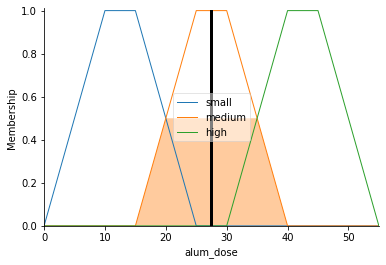

In [8]:
# Simulation
  # Initial Turbidity = 50-200 NTU
  # Initial pH = 6-14
  # Desired Turbidity = 0-5 NTU
  # Aluminum Sulfate Input = 0-55 mg/L
simulation = ctrl.ControlSystemSimulation(system)
simulation.input['initial_turbidity'] = 30
simulation.input['initial_pH'] = 11
simulation.input['desired_turbidity'] = 1
simulation.compute()
print(simulation.output["alum_dose"], "mg/L")
alum_dose.view(sim = simulation)